In [45]:
#Importing important files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
#dataset
data=pd.read_csv("Salary_Data.csv")

In [47]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [48]:
#Determining values of Input and output
X=data.iloc[:,0].values
y=data.iloc[:,1].values

In [49]:
#Cheching the shape
print(X.shape)
print(y.shape)

(30,)
(30,)


In [50]:
#Creating class containing two methods
class LinRegr_GradDes:
    def __init__(self,lr=0.001):
        self.m=0
        self.b=0
        self.lr=lr
    def fit(self,X,y):
        for _ in range(1000):
            y_pred=(self.m*X)+self.b
            ss_b=2*sum(y_pred-y)
            ss_m=2*sum(X*(y_pred-y))
            self.m=self.m-(ss_m*self.lr)
            self.b=self.b-(ss_b*self.lr)
        return self
    def predict(self,test_X):
        return((self.m*test_X)+self.b)

In [51]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [52]:
#Creating an object of LinRegr_GradDes class
regg=LinRegr_GradDes()

In [53]:
#Fitting the data
regg.fit(X_train,y_train)

In [54]:
#Predicting the output
y_pred=regg.predict(X_test)
y_pred

array([ 40747.84610873, 122700.53693219,  64961.14112476,  63098.57996968,
       115250.29231188, 107800.04769156])

In [55]:
#Checking th accuracy
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)*100
print("The accuracy is ",accuracy)

The accuracy is  98.81723531509394


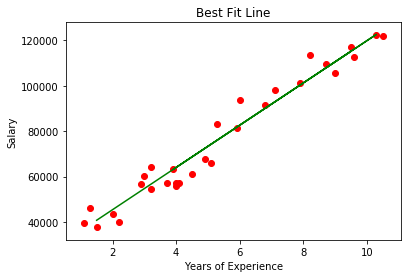

In [57]:
#plotting the best fit line
plt.plot(X_test,y_pred,color='green')
plt.scatter(X,y,color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Best Fit Line")
plt.show()